In [83]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Exploratory Data Analysis

In [84]:
import pandas as pd
import numpy as np

train_x = pd.read_csv("data/training_set_values.csv", index_col="id")
train_y = pd.read_csv("data/training_set_labels.csv", index_col="id")

train_x["status_group"] = train_y["status_group"]

### Numerical Data
- `amount_tsh` - Total static head (amount water available to waterpoint) 
- `gps_height` - Altitude of the well
- `population` - Population around the well
- `construction_year` - Year the waterpoint was constructed

### Region
- `longitude` - GPS coordinate
- `latitude` - GPS coordinate
- `basin` - Geographic water basin
- `subvillage` - Geographic location
- `region` - Geographic location
- `region_code` - Geographic location (coded)
- `district_code` - Geographic location (coded)
- `lga` - Geographic location
- `ward` - Geographic location

### categorical
- `public_meeting` - True/False
- `extraction_type` - The kind of extraction the waterpoint uses
- `extraction_type_group` - The kind of extraction the waterpoint uses
- `extraction_type_class` - The kind of extraction the waterpoint uses
- `permit` - If the waterpoint is permitted
- `water_quality` - The quality of the water
- `quality_group` - The quality of the water
- `quantity` - The quantity of water
- `source` - The source of the water
- `source_type` - The source of the water
- `source_class` - The source of the water
- `waterpoint_type` - The kind of waterpoint
- `waterpoint_type_group` - The kind of waterpoint


## Maintainers
- `funder` - Who funded the well
- `installer` - Organization that installed the well
- `wpt_name` - Name of the waterpoint if there is one
- `scheme_management` - Who operates the waterpoint
- `scheme_name` - Who operates the waterpoint
- `management` - How the waterpoint is managed
- `management_group` - How the waterpoint is managed


## payment
- `payment` - What the water costs
- `payment_type` - What the water costs


## Others
- `num_private` -
- `date_recorded` - The date the row was entered 
- `recorded_by` - Group entering this row of data

# Missing Data Analysis

In [85]:
## NaNs Anaylsis
train_x.isnull().sum().sort_values(ascending=False).loc[lambda x: x > 0]

scheme_name          28810
scheme_management     3878
installer             3655
funder                3637
public_meeting        3334
permit                3056
subvillage             371
wpt_name                 2
dtype: int64

In [86]:
## Zeros Analysis
train_x[train_x == 0].count().sort_values(ascending=False).loc[lambda x: x > 0]

num_private          58643
amount_tsh           41639
population           21381
construction_year    20709
gps_height           20438
permit               17492
public_meeting        5055
longitude             1812
district_code           23
dtype: int64

## Regional Anlaysis

### Aim: 
- Analysis water pump functional status based on regions

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(
    style="ticks",
    context="paper",
    palette="crest",
    rc={"axes.spines.right": False, "axes.spines.top": False},
)
sia_color = "#1DE9B6"

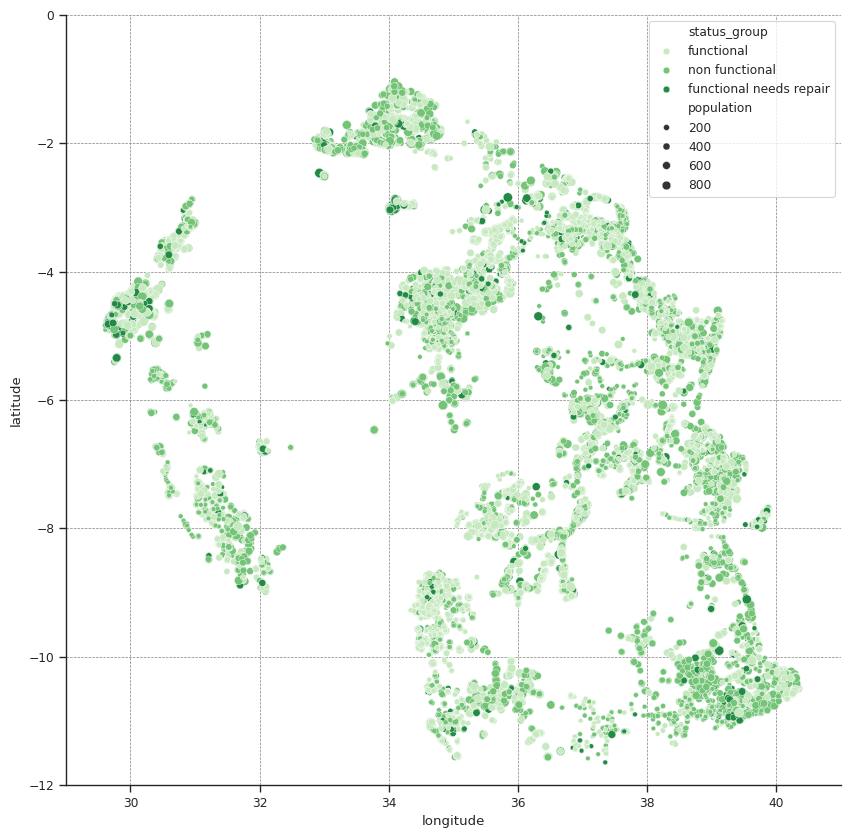

In [88]:
from seaborn import color_palette

plot_df = train_x[(train_x["population"] > 0) & (train_x["population"] < 1000)]

fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(
    x=plot_df["longitude"],
    y=plot_df["latitude"],
    hue=plot_df["status_group"],
    size=plot_df["population"],
    ax=ax,
    palette="Greens",
)
ax.set_xlim(29, 41)
ax.set_ylim(-12, 0)
plt.grid(color="gray", linestyle="--", linewidth=0.5)

In [89]:
# Imputing missing population

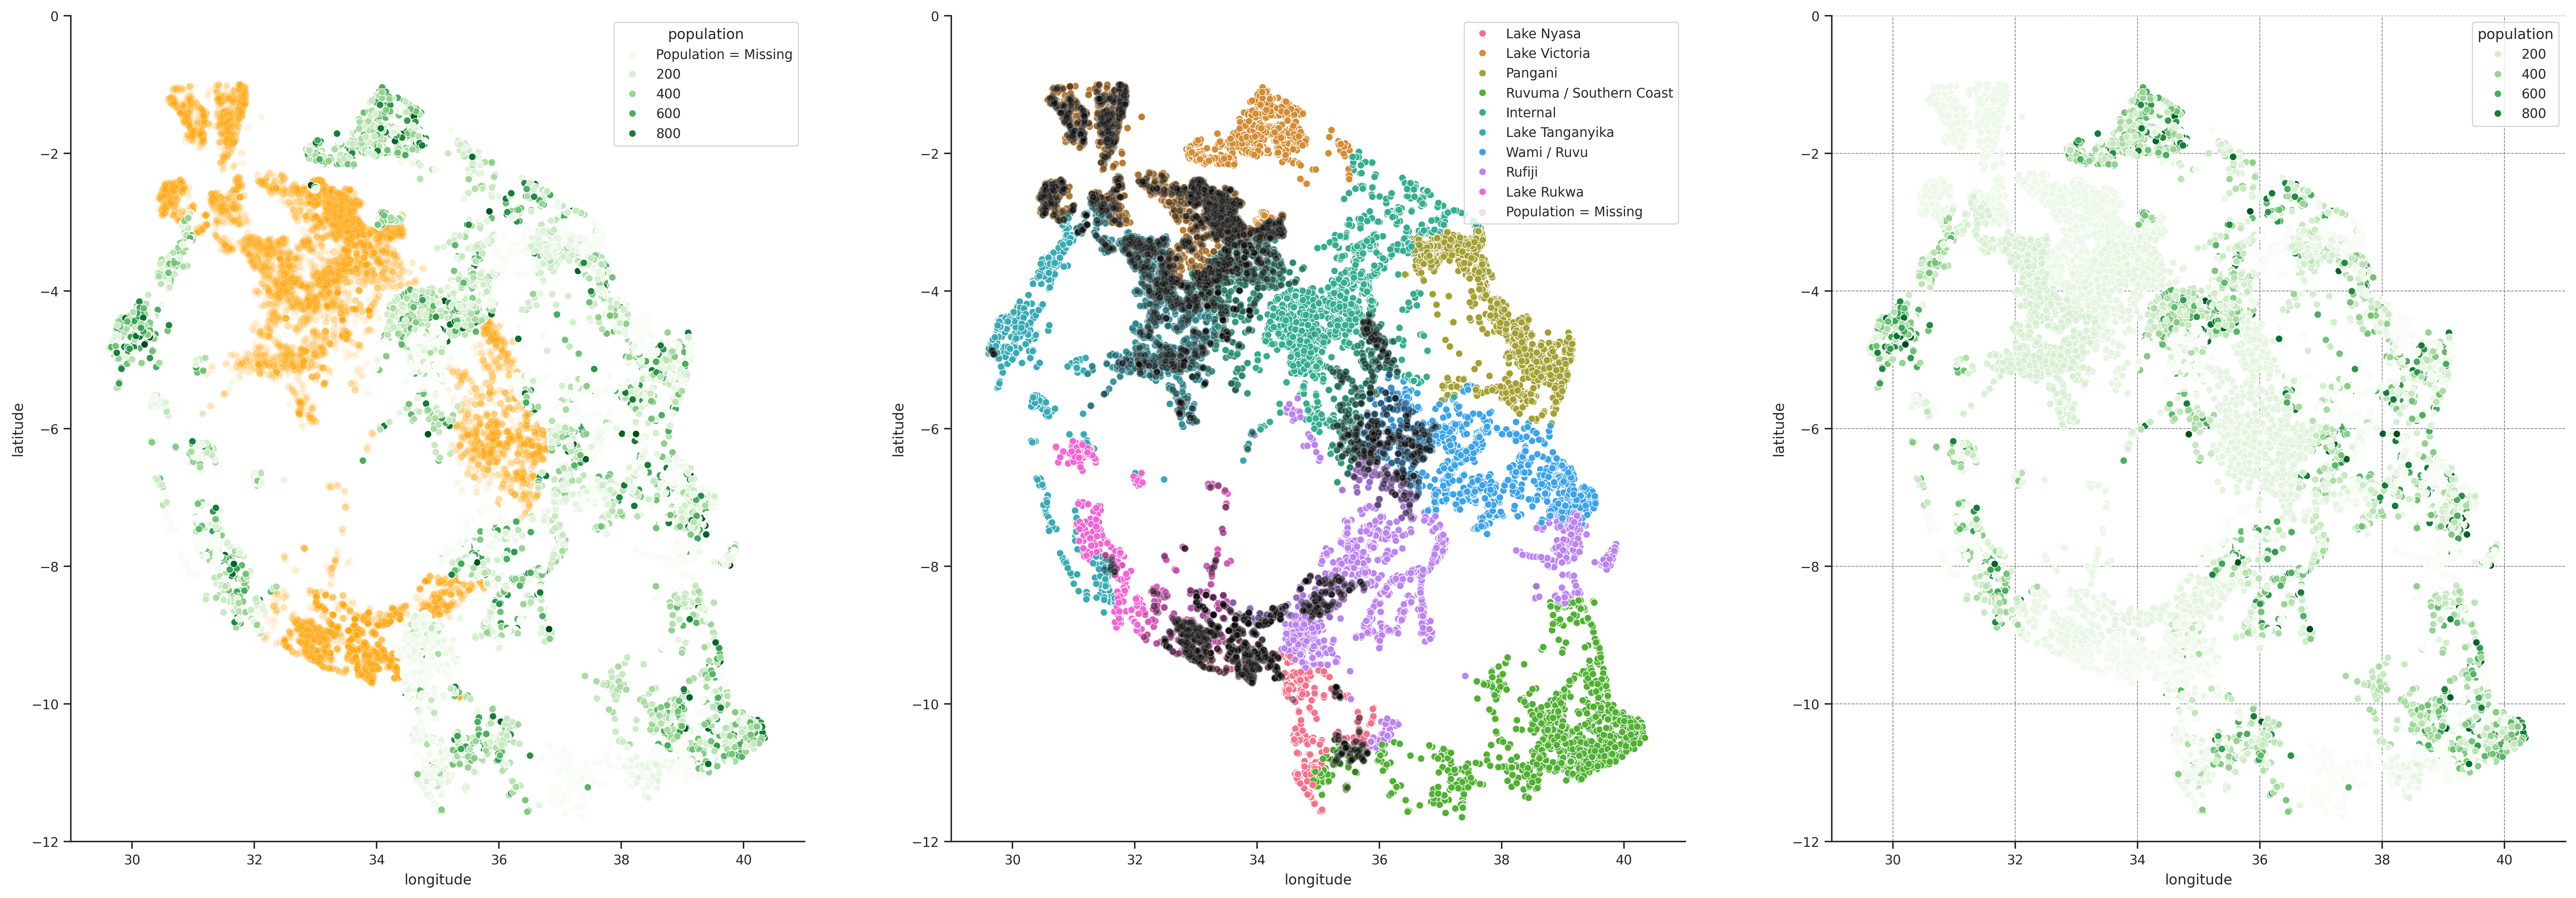

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(30, 10), dpi=300)

plot_df = train_x[(train_x["population"] == 0)]
sns.scatterplot(
    x=plot_df["longitude"],
    y=plot_df["latitude"],
    ax=ax[0],
    alpha=0.1,
    label="Population = Missing",
    color="orange",
)

plot_df = train_x[(train_x["population"] > 0) & (train_x["population"] < 1000)]
sns.scatterplot(
    x=plot_df["longitude"],
    y=plot_df["latitude"],
    hue=plot_df["population"],
    ax=ax[0],
    palette="Greens",
)


plot_df = train_x
sns.scatterplot(
    x=plot_df["longitude"], y=plot_df["latitude"], hue=plot_df["basin"], ax=ax[1]
)

plot_df = train_x[(train_x["population"] == 0)]
sns.scatterplot(
    x=plot_df["longitude"],
    y=plot_df["latitude"],
    ax=ax[1],
    alpha=0.1,
    label="Population = Missing",
    color="black",
)

plot_df = train_x[(train_x["population"] < 1000)]
plot_df = plot_df.assign(
    population=lambda df: np.where(
        df["population"] == 0,
        df["basin"].map(df.groupby("basin")["population"].mean().to_dict()),
        df["population"],
    )
)
sns.scatterplot(
    x=plot_df["longitude"],
    y=plot_df["latitude"],
    hue=plot_df["population"],
    ax=ax[2],
    palette="Greens",
)
for _ax in ax:
    _ax.set_xlim(29, 41)
    _ax.set_ylim(-12, 0)

plt.grid(color="gray", linestyle="--", linewidth=0.5)

In [91]:
from src.preprocess import preprocess_data

df = preprocess_data(train_x)

/home/afaq/personal_code/machinelearning/tanzania_water_pump/src/preprocess.py:95: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  public_meeting=df.public_meeting.fillna(False).astype(int),
/home/afaq/personal_code/machinelearning/tanzania_water_pump/src/preprocess.py:96: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  permit=df.permit.fillna(False).astype(int),
/home/afaq/personal_code/machinelearning/tanzania_water_pump/src/preprocess.py:102: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain 

In [92]:
## NaNs Anaylsis
df.isnull().sum().sort_values(ascending=False).loc[lambda x: x > 0]

Series([], dtype: int64)

In [93]:
## Zeros Analysis
df[df == 0].count().sort_values(ascending=False).loc[lambda x: x > 0]
# all un-wanted zeros are removed

permit            20548
ground_water      13328
public_meeting     8389
age                 588
dtype: int64

<Axes: xlabel='status_group', ylabel='count'>

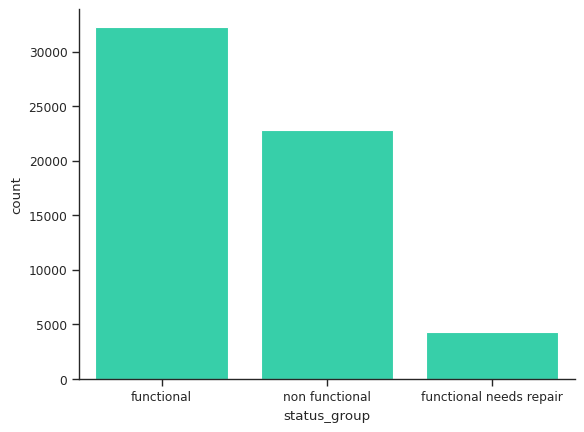

In [94]:
sns.countplot(data=df, x="status_group", color=sia_color)

/tmp/ipykernel_12867/2132698086.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(


<Axes: xlabel='age'>

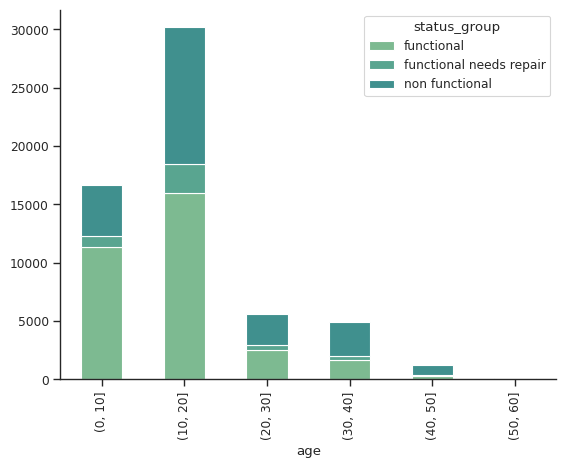

In [95]:
df.groupby(
    [
        pd.cut(df.age, bins=[0, 10, 20, 30, 40, 50, 60]),
        "status_group",
    ]
).size().unstack().plot(kind="bar", stacked=True)

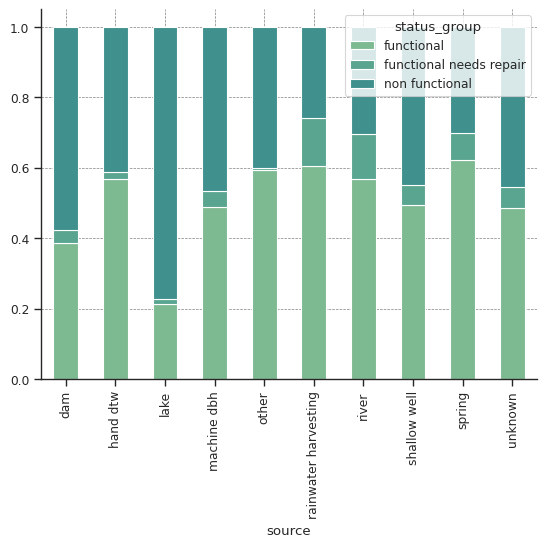

In [96]:
# water source vs status group analysis (normalized)
normalized_output = df.groupby(["source", "status_group"]).size().unstack()
normalized_output.div(normalized_output.sum(axis=1), axis=0).plot(
    kind="bar", stacked=True
)
plt.grid(color="gray", linestyle="--", linewidth=0.5)

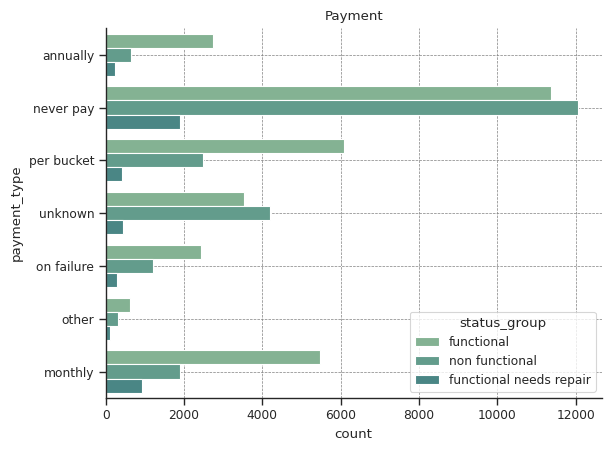

In [97]:
sns.countplot(data=df, y="payment_type", hue="status_group")
plt.title("Payment")
plt.grid(color="gray", linestyle="--", linewidth=0.5)

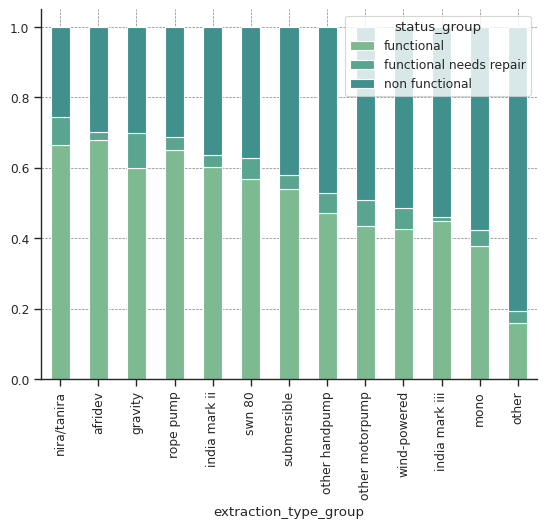

In [98]:
# type of extraction vs status group Normalized
normalized_output = (
    train_x.groupby(["extraction_type_group", "status_group"]).size().unstack()
)
normalized_output.div(normalized_output.sum(axis=1), axis=0).sort_values(
    by="non functional"
).plot(kind="bar", stacked=True)
plt.grid(color="gray", linestyle="--", linewidth=0.5)

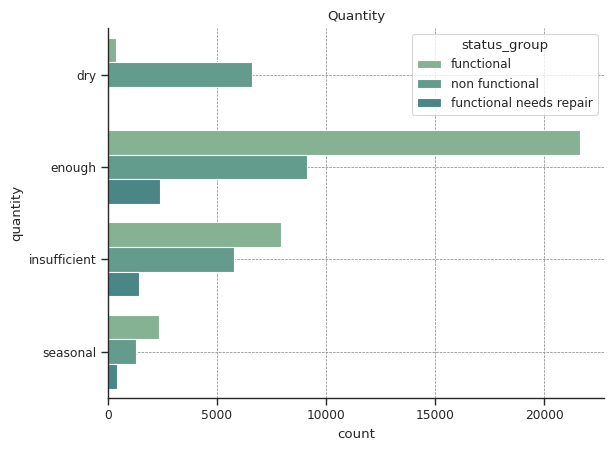

In [99]:
sns.countplot(data=df, y="quantity", hue="status_group")
plt.title("Quantity")
plt.grid(color="gray", linestyle="--", linewidth=0.5)

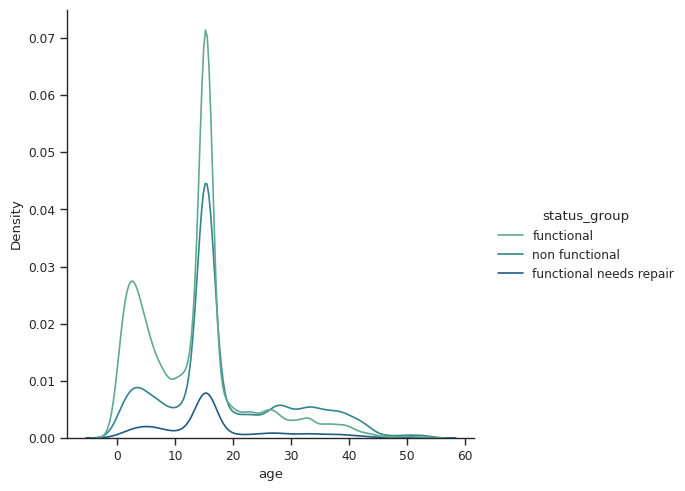

In [ ]:
sns.displot(data=df, x="age", hue="status_group", kind="kde", palette="crest")